This document contains all the meta information regarding the columns described in the CSV files for a comprehensive analysis of IPL matches over the past three years (2021, 2022, 2023). We have provided 4 CSV files:

1. dim_match_summary

2. fact_batting_summary

3. fact_bowling_summary

4. dim_players





Column Description for dim_match_summary:

- team1: Name of the team batting first.

- team2: Name of the team batting second.

- winner: The team that won the match.

- margin: The margin by which the winning team won (runs or wickets).

- matchDate: The date on which the match was played, formatted as MMM DD, YYYY.

- match_id: Unique identifier for each match, prefixed with 'T'.

*******************************************



Column Description for dim_players:

- name: The full name of the player.

- team: The IPL team the player is associated with.

- battingStyle: The batting style of the player (e.g., Right hand Bat, Left hand Bat).

- bowlingStyle: The bowling style of the player (e.g., Right arm Offbreak, Legbreak).

- playingRole: The primary role of the player in the team (e.g., Batter, Bowler, Allrounder).



*******************************************



Column Description for fact_batting_summary:

match_id: Links to the dim_match_summary for match details, prefixed with 'T'.

match: Description of the match in "Team1 Vs Team2" format.

teamInnings: The team that is batting in the specified innings.

battingPos: The batting order position of the player.

batsmanName: The name of the batsman.

out/not_out: Indicates whether the batsman was out or not out.

runs: The number of runs scored by the batsman.

balls: The number of balls faced by the batsman.

4s: The number of boundaries (4 runs) hit by the batsman.

6s: The number of sixes hit by the batsman.

SR (Strike Rate): The strike rate of the batsman during the innings.


*******************************************





Column Description for fact_bowling_summary:

match_id: Links to the dim_match_summary for match details, prefixed with 'T'.

match: Description of the match in "Team1 Vs Team2" format.

bowlingTeam: The team that is bowling in the specified innings.

bowlerName: The name of the bowler.

overs: The number of overs bowled by the player.

maiden: The number of maiden overs bowled.

runs: The number of runs conceded by the bowler.

wickets: The number of wickets taken by the bowler.

economy: The bowler's economy rate.

0s: The number of dot balls bowled.

4s: The number of boundaries conceded.

6s: The number of sixes conceded.

wides: The number of wide balls bowled.

noBalls: The number of no balls bowled.





*******************************************

In [1061]:
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1062]:
import pandas as pd
import plotly as px
import numpy as np
from sklearn.linear_model import LinearRegression

In [1063]:
matches=pd.read_csv("IPL DS\dim_match_summary.csv")
players=pd.read_csv("IPL DS\dim_players.csv")
bat_sum=pd.read_csv("IPL DS\\fact_bating_summary.csv")
bowl_sum=pd.read_csv("IPL DS\\fact_bowling_summary.csv")

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

<>:1: SyntaxWarning:

invalid escape sequence '\d'

<>:2: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Sravanthi\AppData\Local\Temp\ipykernel_17156\83693405.py:1: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\Sravanthi\AppData\Local\Temp\ipykernel_17156\83693405.py:2: SyntaxWarning:

invalid escape sequence '\d'



In [1064]:
print(matches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   team1      206 non-null    object
 1   team2      206 non-null    object
 2   winner     206 non-null    object
 3   margin     206 non-null    object
 4   matchDate  206 non-null    object
 5   match_id   206 non-null    object
dtypes: object(6)
memory usage: 9.8+ KB
None


In [1065]:
matches.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [1066]:
print(players.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          292 non-null    object
 1   team          292 non-null    object
 2   battingStyle  292 non-null    object
 3   bowlingStyle  292 non-null    object
 4   playingRole   292 non-null    object
dtypes: object(5)
memory usage: 11.5+ KB
None


In [1067]:
players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [1068]:
print(bat_sum.info)

<bound method DataFrame.info of      match_id                  match  teamInnings  battingPos     batsmanName  \
0     T203817     Super Kings Vs KKR  Super Kings           1  RuturajGaikwad   
1     T203817     Super Kings Vs KKR  Super Kings           2    FafduPlessis   
2     T203817     Super Kings Vs KKR  Super Kings           3    RobinUthappa   
3     T203817     Super Kings Vs KKR  Super Kings           4        MoeenAli   
4     T203817     Super Kings Vs KKR          KKR           1     ShubmanGill   
...       ...                    ...          ...         ...             ...   
3263  T201566  Super Kings Vs Titans       Titans           3    SaiSudharsan   
3264  T201566  Super Kings Vs Titans       Titans           4    HardikPandya   
3265  T201566  Super Kings Vs Titans       Titans           5    VijayShankar   
3266  T201566  Super Kings Vs Titans       Titans           6    RahulTewatia   
3267  T201566  Super Kings Vs Titans       Titans           7      RashidKhan

In [1069]:
bat_sum.head()


,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [1070]:
print(bowl_sum.info)

<bound method DataFrame.info of      match_id                  match  bowlingTeam             bowlerName  \
0     T203817     Super Kings Vs KKR          KKR          ShakibAlHasan   
1     T203817     Super Kings Vs KKR          KKR             ShivamMavi   
2     T203817     Super Kings Vs KKR          KKR         LockieFerguson   
3     T203817     Super Kings Vs KKR          KKR      VarunChakravarthy   
4     T203817     Super Kings Vs KKR          KKR            SunilNarine   
...       ...                    ...          ...                    ...   
2431  T201566  Super Kings Vs Titans  Super Kings           DeepakChahar   
2432  T201566  Super Kings Vs Titans  Super Kings        TusharDeshpande   
2433  T201566  Super Kings Vs Titans  Super Kings  RajvardhanHangargekar   
2434  T201566  Super Kings Vs Titans  Super Kings        MitchellSantner   
2435  T201566  Super Kings Vs Titans  Super Kings         RavindraJadeja   

      overs  maiden  runs  wickets  economy  0s  4s  6s

In [1071]:
bowl_sum.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


In [1072]:
matches.drop_duplicates()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942
...,...,...,...,...,...,...
201,Mumbai,RCB,RCB,8 wickets,"Apr 2, 2023",T202485
202,Royals,Sunrisers,Royals,72 runs,"Apr 2, 2023",T209117
203,Super Giants,Capitals,Super Giants,50 runs,"Apr 1, 2023",T208512
204,Punjab Kings,KKR,Punjab Kings,7 runs,"Apr 1, 2023",T202853


In [1073]:
import matplotlib.pyplot as plt

In [1074]:
#1  Top 10 batsmen based on past 3 years total runs scored.


top10 = (bat_sum.groupby('batsmanName')['runs'].sum()
         .sort_values(ascending=False)
         .head(10))

display(top10)

batsmanName
ShubmanGill        1851
FafduPlessis       1831
RuturajGaikwad     1593
KLRahul            1516
JosButtler         1509
ShikharDhawan      1392
ViratKohli         1385
SanjuSamson        1304
SuryakumarYadav    1225
GlennMaxwell       1214
Name: runs, dtype: int64

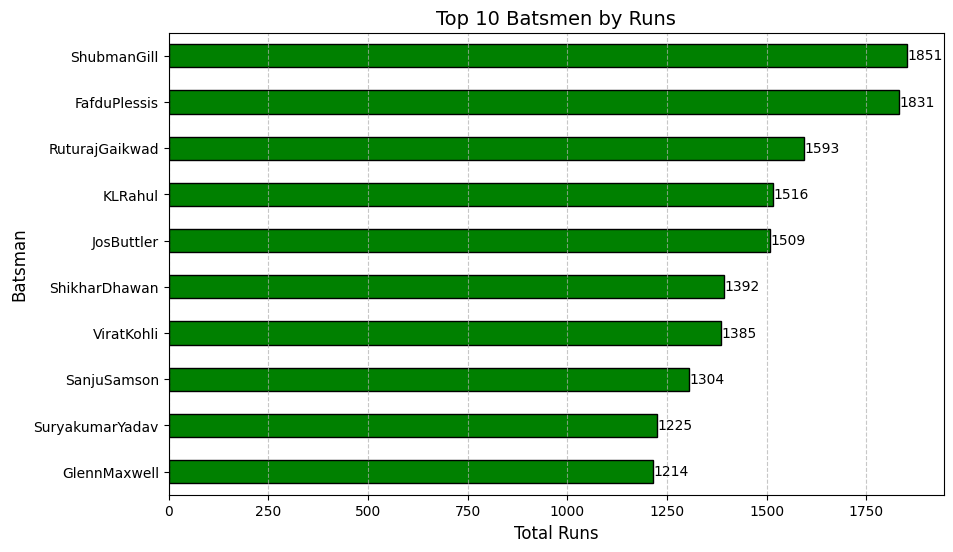

In [1075]:
#1

top10 = (bat_sum.groupby('batsmanName')['runs'].sum()
         .sort_values(ascending=False)
         .head(10))

top10_sorted = top10.sort_values()

plt.figure(figsize=(10,6))
top10_sorted.plot(kind='barh', color='green', edgecolor='black')

plt.title("Top 10 Batsmen by Runs", fontsize=14)
plt.xlabel("Total Runs", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(top10_sorted.values):
    plt.text(v+1, i, str(v), va='center')

plt.show()

In [1076]:
# Merge matchDate from matches into bat_sum
bat_sum = bat_sum.merge(matches[['match_id', 'matchDate']], on='match_id', how='left')
bat_sum.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR,matchDate
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51,"Oct 15, 2021"
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76,"Oct 15, 2021"
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66,"Oct 15, 2021"
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00,"Oct 15, 2021"
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60,"Oct 15, 2021"


In [1077]:
#2 Top 10 batsmen based on past 3 years batting average. (min 60 balls faced in each season)

# Convert matchDate to datetime and extract year
bat_sum['year'] = pd.to_datetime(bat_sum['matchDate'], errors='coerce').dt.year

# Aggregate per batsman per year
stats = (bat_sum.groupby(['year', 'batsmanName'])
                 .agg(
                     runs=('runs', 'sum'),
                     balls=('balls', 'sum'),
                     outs=('out/not_out', lambda x: (x=='out').sum())
                 ))

# Filter by minimum 60 balls per season
stats = stats[stats['balls'] >= 60]

# Compute batting average per year
stats['batting_avg'] = stats['runs'] / stats['outs']

print(stats)


                         runs  balls  outs  batting_avg
year   batsmanName                                     
2021.0 ABdeVilliers       313    211    10    31.300000
       AbdulSamad         111     87     9    12.333333
       AbhishekSharma      93     69     5    18.600000
       AidenMarkram       146    119     5    29.200000
       AmbatiRayudu       257    170    10    25.700000
...                       ...    ...   ...          ...
2023.0 VijayShankar       301    188     8    37.625000
       ViratKohli         639    457    12    53.250000
       WashingtonSundar    60     60     4    15.000000
       WriddhimanSaha     317    248    15    21.133333
       YashasviJaiswal    625    382    13    48.076923

[218 rows x 4 columns]


In [1078]:
#2

valid_batsmen = stats.reset_index().groupby('batsmanName')['year'].nunique()
valid_batsmen = valid_batsmen[valid_batsmen == 3].index

stats = stats.loc[stats.index.get_level_values('batsmanName').isin(valid_batsmen)]

# Step 3: compute overall batting average = total runs / total outs across 3 years
overall = stats.groupby('batsmanName').agg(
    total_runs=('runs','sum'),
    total_outs=('outs','sum'),
    total_balls=('balls','sum')
)

overall['batting_avg'] = overall['total_runs'] / overall['total_outs']

# Top 10 batsmen by overall batting average
AVG_10 = overall.sort_values('batting_avg', ascending=False).head(10)

print(AVG_10)

                 total_runs  total_outs  total_balls  batting_avg
batsmanName                                                      
KLRahul                1516          30         1148    50.533333
FafduPlessis           1831          42         1300    43.595238
DavidMiller             864          20          628    43.200000
JosButtler             1509          36         1027    41.916667
ShimronHetmyer          854          21          543    40.666667
ShubmanGill            1812          45         1311    40.266667
ShikharDhawan          1392          35         1081    39.771429
RuturajGaikwad         1567          41         1141    38.219512
DavidWarner            1137          30          852    37.900000
SuryakumarYadav        1225          35          763    35.000000


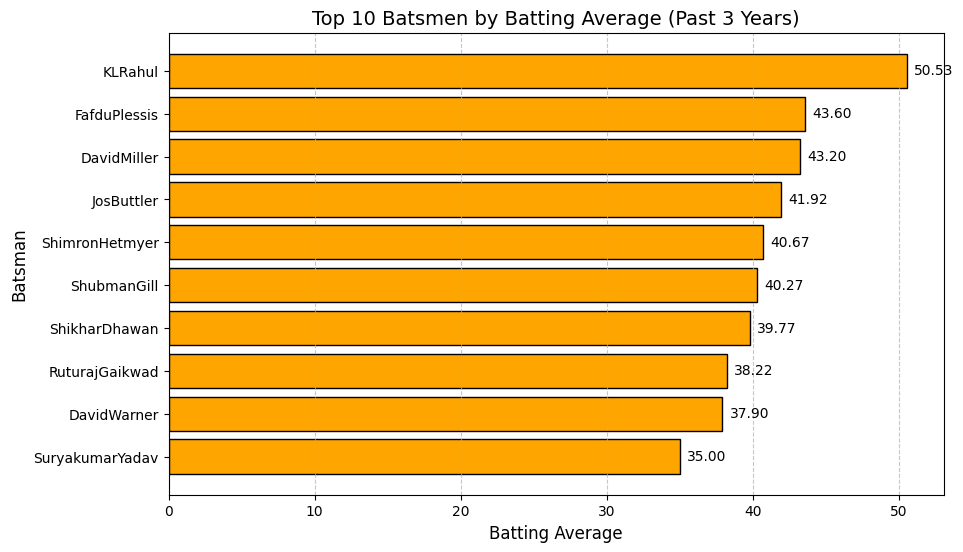

In [1079]:
#2

# Sort values so bars are ordered from lowest to highest
AVG_10_sorted = AVG_10.sort_values('batting_avg')

plt.figure(figsize=(10,6))
plt.barh(AVG_10_sorted.index, AVG_10_sorted['batting_avg'], 
         color='orange', edgecolor='black')

plt.title("Top 10 Batsmen by Batting Average (Past 3 Years)", fontsize=14)
plt.xlabel("Batting Average", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(AVG_10_sorted['batting_avg']):
    plt.text(v+0.5, i, f"{v:.2f}", va='center')

plt.show()

In [1080]:
#3  Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

# Convert matchDate to datetime and extract year
bat_sum['year'] = pd.to_datetime(bat_sum['matchDate'], errors='coerce').dt.year

# Aggregate per batsman per year
stats = (bat_sum.groupby(['year', 'batsmanName'])
                 .agg(
                     runs=('runs', 'sum'),
                     balls=('balls', 'sum')
                 ))

# Filter by minimum 60 balls per season
stats = stats[stats['balls'] >= 60]

# strike rate for each year
stats['strike_rate'] = (stats['runs'] / stats['balls']) * 100

print(stats)


                         runs  balls  strike_rate
year   batsmanName                               
2021.0 ABdeVilliers       313    211   148.341232
       AbdulSamad         111     87   127.586207
       AbhishekSharma      93     69   134.782609
       AidenMarkram       146    119   122.689076
       AmbatiRayudu       257    170   151.176471
...                       ...    ...          ...
2023.0 VijayShankar       301    188   160.106383
       ViratKohli         639    457   139.824945
       WashingtonSundar    60     60   100.000000
       WriddhimanSaha     317    248   127.822581
       YashasviJaiswal    625    382   163.612565

[218 rows x 3 columns]


In [1081]:
#3

valid_batsmen = stats.reset_index().groupby('batsmanName')['year'].nunique()
valid_batsmen = valid_batsmen[valid_batsmen == 3].index

stats = stats.loc[stats.index.get_level_values('batsmanName').isin(valid_batsmen)]

# Step: compute overall batting average = total runs / total outs across 3 years
overall = stats.groupby('batsmanName').agg(
    total_runs=('runs','sum'),
    total_balls=('balls','sum')
)

overall['strike_rate'] = (overall['total_runs'] / overall['total_balls'])*100

# Top 10 batsmen by overall batting average
SR_10 = overall.sort_values('strike_rate', ascending=False).head(10)

print(SR_10)

                 total_runs  total_balls  strike_rate
batsmanName                                          
GlennMaxwell           1214          752   161.436170
SuryakumarYadav        1225          763   160.550459
AndreRussell            745          468   159.188034
ShimronHetmyer          854          543   157.274401
NicholasPooran          729          464   157.112069
PrithviShaw             815          532   153.195489
DineshKarthik           693          454   152.643172
YashasviJaiswal        1132          744   152.150538
JosButtler             1509         1027   146.932814
ShivamDube              905          621   145.732689


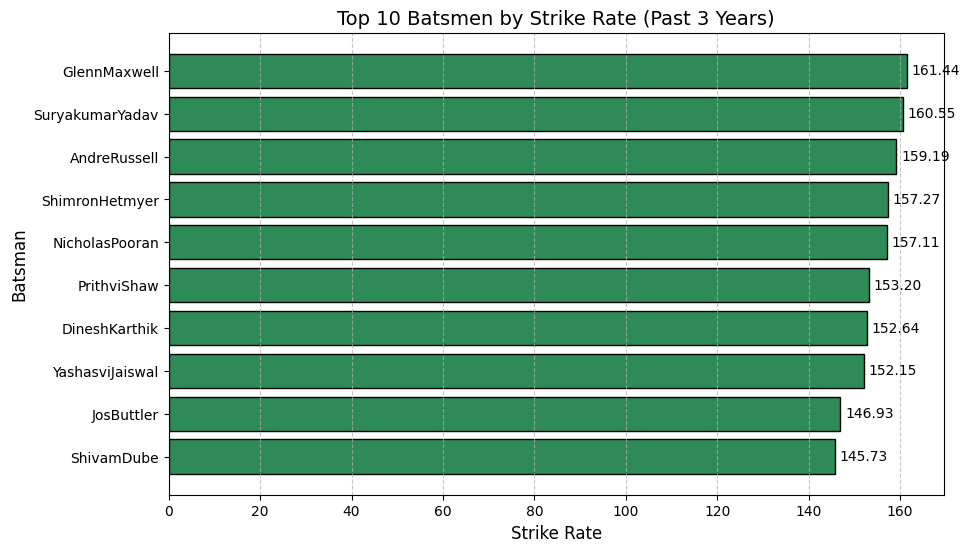

In [1082]:
#3

SR_10_sorted = SR_10.sort_values('strike_rate')

plt.figure(figsize=(10,6))
plt.barh(SR_10_sorted.index, SR_10_sorted['strike_rate'], 
         color='seagreen', edgecolor='black')

plt.title("Top 10 Batsmen by Strike Rate (Past 3 Years)", fontsize=14)
plt.xlabel("Strike Rate", fontsize=12)
plt.ylabel("Batsman", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate strike rate values on bars
for i, v in enumerate(SR_10_sorted['strike_rate']):
    plt.text(v+1, i, f"{v:.2f}", va='center')

plt.show()

In [1083]:
#4  Top 10 bowlers based on past 3 years total wickets taken.

# Aggregate total wickets per bowler
wickets = bowl_sum.groupby('bowlerName').agg(total_wickets=('wickets', 'sum'))

# Sort descending and get top 10
top_bowlers = wickets.sort_values('total_wickets', ascending=False).head(10)

print(top_bowlers)


                   total_wickets
bowlerName                      
MohammedShami                 67
YuzvendraChahal               66
HarshalPatel                  65
RashidKhan                    63
AveshKhan                     47
ArshdeepSingh                 45
KagisoRabada                  45
VarunChakravarthy             44
ShardulThakur                 43
TrentBoult                    42


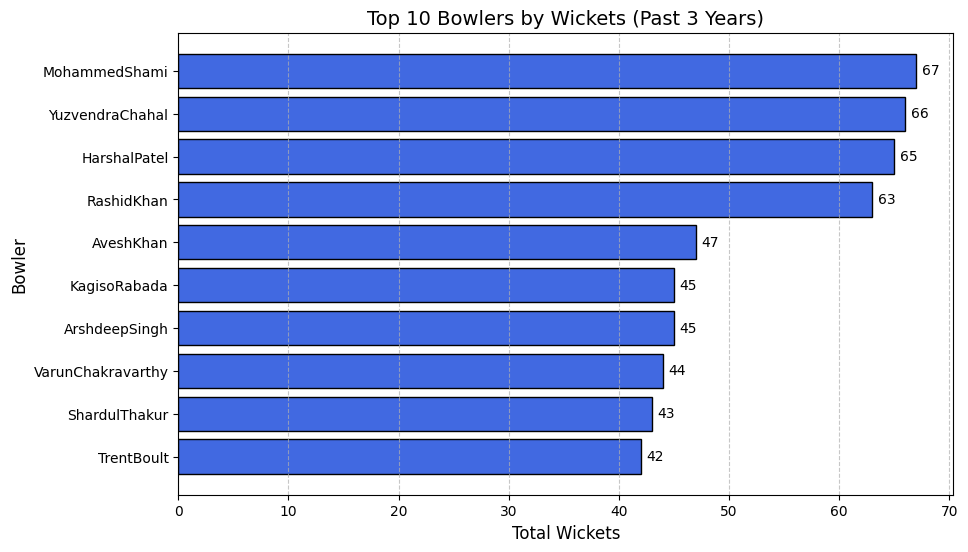

In [1084]:
#4

top_bowlers_sorted = top_bowlers.sort_values('total_wickets')

plt.figure(figsize=(10,6))
plt.barh(top_bowlers_sorted.index, top_bowlers_sorted['total_wickets'], 
         color='royalblue', edgecolor='black')

plt.title("Top 10 Bowlers by Wickets (Past 3 Years)", fontsize=14)
plt.xlabel("Total Wickets", fontsize=12)
plt.ylabel("Bowler", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate wicket values on bars
for i, v in enumerate(top_bowlers_sorted['total_wickets']):
    plt.text(v+0.5, i, str(v), va='center')

plt.show()

In [1085]:
# Merge matchDate from matches into bowl_sum
bowl_sum = bowl_sum.merge(matches[['match_id', 'matchDate']], on='match_id', how='left')
bowl_sum.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,matchDate
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0,"Oct 15, 2021"
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0,"Oct 15, 2021"
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0,"Oct 15, 2021"
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1,"Oct 15, 2021"
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0,"Oct 15, 2021"


In [1086]:
#5  Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)

bowl_sum['year'] = pd.to_datetime(bowl_sum['matchDate'], errors='coerce').dt.year

# Aggregate per batsman per year
stats = (bowl_sum.groupby(['year', 'bowlerName'])
                 .agg(
                     overs=('overs','sum'),
                     runs=('runs', 'sum'),
                     wickets=('wickets', 'sum')
                 ))

# Filter by minimum 10 overs per season
stats = stats[stats['overs'] >= 10]

# Compute bowler average per year
stats['bowling_avg'] = stats['runs'] / stats['wickets']

print(stats)


                         overs  runs  wickets  bowling_avg
year   bowlerName                                         
2021.0 AdamMilne          14.0   131        3    43.666667
       AmitMishra         10.0    78        5    15.600000
       AndreRussell       19.0   188       11    17.090909
       AnrichNortje       30.2   187       12    15.583333
       ArshdeepSingh      40.8   342       18    19.000000
...                        ...   ...      ...          ...
2023.0 WashingtonSundar   17.4   146        3    48.666667
       WayneParnell       25.1   236        9    26.222222
       YashDayal          14.0   165        2    82.500000
       YashThakur         31.5   289       13    22.230769
       YuzvendraChahal    52.5   432       21    20.571429

[233 rows x 4 columns]


In [1087]:
#5

valid_bowler = stats.reset_index().groupby('bowlerName')['year'].nunique()
valid_bowler = valid_bowler[valid_bowler == 3].index

stats = stats.loc[stats.index.get_level_values('bowlerName').isin(valid_bowler)]

# Step: compute overall batting average = total runs / total outs across 3 years
overall = stats.groupby('bowlerName').agg(
    total_runs=('runs','sum'),
    total_wickets=('wickets','sum')
)

overall['bowling_average'] = overall['total_runs'] / overall['total_wickets']

# Top 10 batsmen by overall batting average
BA_10 = overall.sort_values('bowling_average').head(10)

print(BA_10)

                 total_runs  total_wickets  bowling_average
bowlerName                                                 
AndreRussell            638             35        18.228571
YuzvendraChahal        1333             66        20.196970
RashidKhan             1273             63        20.206349
HarshalPatel           1323             65        20.353846
MohammedShami          1376             67        20.537313
AveshKhan              1115             47        23.723404
KagisoRabada           1069             45        23.755556
MoeenAli                501             21        23.857143
AnrichNortje            768             31        24.774194
UmranMalik              757             29        26.103448


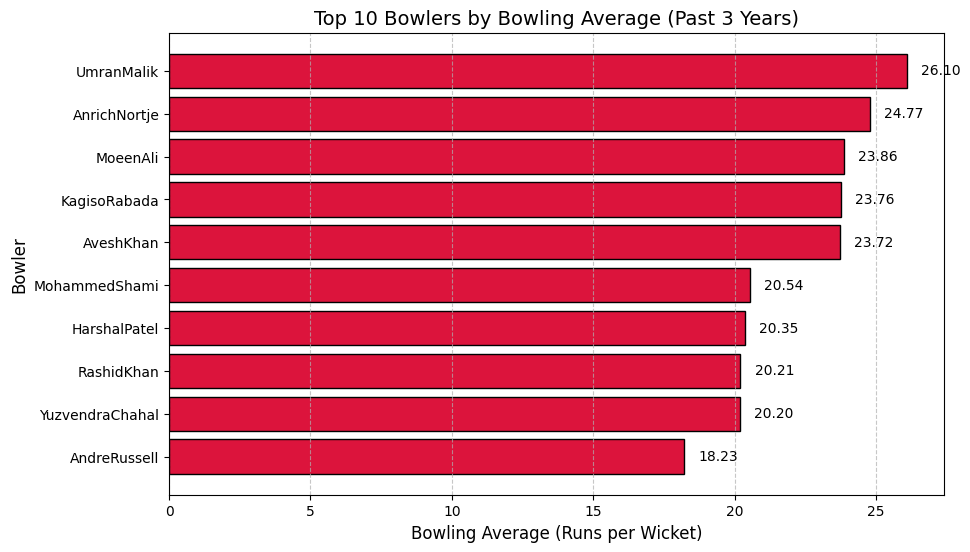

In [1088]:
#5

BA_10_sorted = BA_10.sort_values('bowling_average')

plt.figure(figsize=(10,6))
plt.barh(BA_10_sorted.index, BA_10_sorted['bowling_average'],
         color='crimson', edgecolor='black')

plt.title("Top 10 Bowlers by Bowling Average (Past 3 Years)", fontsize=14)
plt.xlabel("Bowling Average (Runs per Wicket)", fontsize=12)
plt.ylabel("Bowler", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(BA_10_sorted['bowling_average']):
    plt.text(v+0.5, i, f"{v:.2f}", va='center')

plt.show()

In [1089]:
#overs converting

bowl_sum['full_overs'] = bowl_sum['overs'].astype(int)                  
bowl_sum['balls_part'] = ((bowl_sum['overs'] - bowl_sum['full_overs']) * 10).round().astype(int)

# Total balls = overs*6 + balls
bowl_sum['balls'] = bowl_sum['full_overs'] * 6 + bowl_sum['balls_part']

In [1090]:
#6  Top 10 bowlers based on past 3 years economy rate. (min 60 balls bowled in each season)


bowl_sum['year'] = pd.to_datetime(bowl_sum['matchDate'], errors='coerce').dt.year

# Aggregate per batsman per year
stats = (bowl_sum.groupby(['year', 'bowlerName'])
                 .agg(
                     balls=('balls','sum'),
                     runs=('runs', 'sum')
                 ))

# Filter by minimum 10 overs per season
stats = stats[stats['balls'] >= 60]

# Compute bowler average per year
stats['bowling_economy'] = (stats['runs'] / stats['balls'])*6

print(stats)


                         balls  runs  bowling_economy
year   bowlerName                                    
2021.0 AdamMilne            84   131         9.357143
       AmitMishra           60    78         7.800000
       AndreRussell        114   188         9.894737
       AnrichNortje        182   187         6.164835
       ArshdeepSingh       248   342         8.274194
...                        ...   ...              ...
2023.0 WashingtonSundar    106   146         8.264151
       WayneParnell        151   236         9.377483
       YashDayal            84   165        11.785714
       YashThakur          191   289         9.078534
       YuzvendraChahal     317   432         8.176656

[234 rows x 3 columns]


In [1091]:
#6

valid_bowler = stats.reset_index().groupby('bowlerName')['year'].nunique()
valid_bowler = valid_bowler[valid_bowler == 3].index

stats = stats.loc[stats.index.get_level_values('bowlerName').isin(valid_bowler)]

# Step: compute overall batting average = total runs / total outs across 3 years
overall = stats.groupby('bowlerName').agg(
    total_runs=('runs','sum'),
    total_balls=('balls','sum')
)

overall['bowling_economy'] = (overall['total_runs'] / overall['total_balls'])*6

# Top 10 batsmen by overall batting average
BE_10 = overall.sort_values('bowling_economy').head(10)

print(BE_10)

                    total_runs  total_balls  bowling_economy
bowlerName                                                  
SunilNarine               1056          960         6.600000
MoeenAli                   501          427         7.039813
RashidKhan                1273         1079         7.078777
AxarPatel                  939          792         7.113636
RavindraJadeja             976          792         7.393939
KrunalPandya               843          679         7.449190
RavichandranAshwin        1175          940         7.500000
VarunChakravarthy         1209          958         7.572025
HarpreetBrar               503          397         7.602015
RahulChahar               1063          836         7.629187


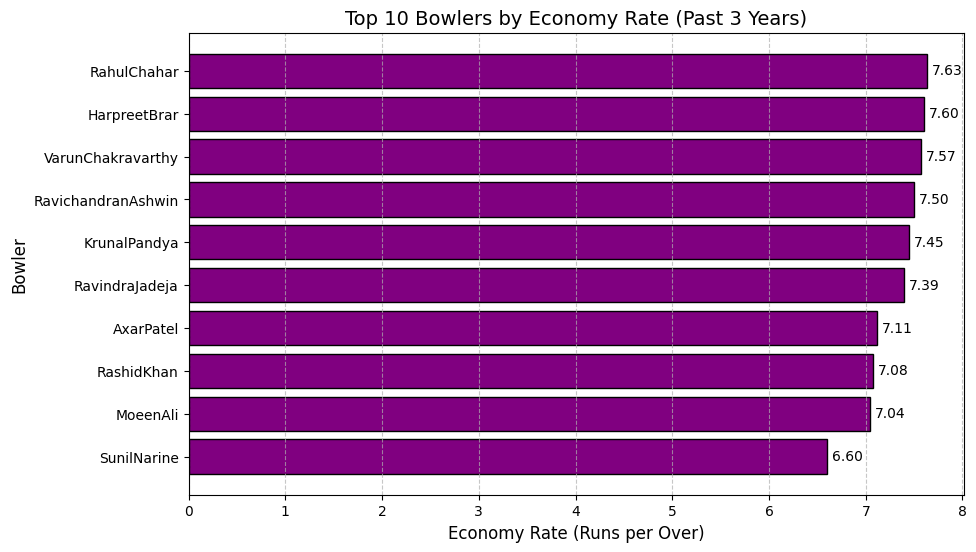

In [1092]:
#6

# Sort so lowest economy comes on top
BE_10_sorted = BE_10.sort_values('bowling_economy')

plt.figure(figsize=(10,6))
plt.barh(BE_10_sorted.index, BE_10_sorted['bowling_economy'],
         color='purple', edgecolor='black')

plt.title("Top 10 Bowlers by Economy Rate (Past 3 Years)", fontsize=14)
plt.xlabel("Economy Rate (Runs per Over)", fontsize=12)
plt.ylabel("Bowler", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate values on bars
for i, v in enumerate(BE_10_sorted['bowling_economy']):
    plt.text(v+0.05, i, f"{v:.2f}", va='center')

plt.show()

In [1093]:
#7 Top 5 batsmen based on past 3 years boundary % (fours and sixes).

bowl_sum['year'] = pd.to_datetime(bowl_sum['matchDate'], errors='coerce').dt.year

stats = (bat_sum.groupby(['year', 'batsmanName'])
                 .agg(
                     runs=('runs','sum'),
                     fours=('4s','sum'),
                     sixes=('6s', 'sum'),
                     balls=('balls','sum')
                 ))

stats = stats[stats['balls'] >= 60]

print(stats)



                         runs  fours  sixes  balls
year   batsmanName                                
2021.0 ABdeVilliers       313     23     16    211
       AbdulSamad         111      4      8     87
       AbhishekSharma      93      7      4     69
       AidenMarkram       146     12      4    119
       AmbatiRayudu       257     16     17    170
...                       ...    ...    ...    ...
2023.0 VijayShankar       301     27     15    188
       ViratKohli         639     65     16    457
       WashingtonSundar    60      6      0     60
       WriddhimanSaha     317     42      7    248
       YashasviJaiswal    625     82     26    382

[218 rows x 4 columns]


In [1094]:
#7

valid_batsman = stats.reset_index().groupby('batsmanName')['year'].nunique()
valid_batsman = valid_batsman[valid_batsman == 3].index

stats = stats.loc[stats.index.get_level_values('batsmanName').isin(valid_batsman)]

overall = stats.groupby('batsmanName').agg(
    total_runs=('runs','sum'),
    total_fours=('fours','sum'),
    total_six=("sixes",'sum'),
    total_balls=('balls','sum'),
)

overall['boundary%'] = (overall['total_fours']*4 + overall['total_six']*6) / overall['total_runs'] * 100

BP_5 = overall.sort_values('boundary%',ascending=False).head()

print(BP_5)

                 total_runs  total_fours  total_six  total_balls  boundary%
batsmanName                                                                
AndreRussell            745           45         64          468  75.704698
YashasviJaiswal        1132          142         46          744  74.558304
PrithviShaw             815          102         28          532  70.674847
JosButtler             1509          152         72         1027  68.919814
GlennMaxwell           1214          108         67          752  68.698517


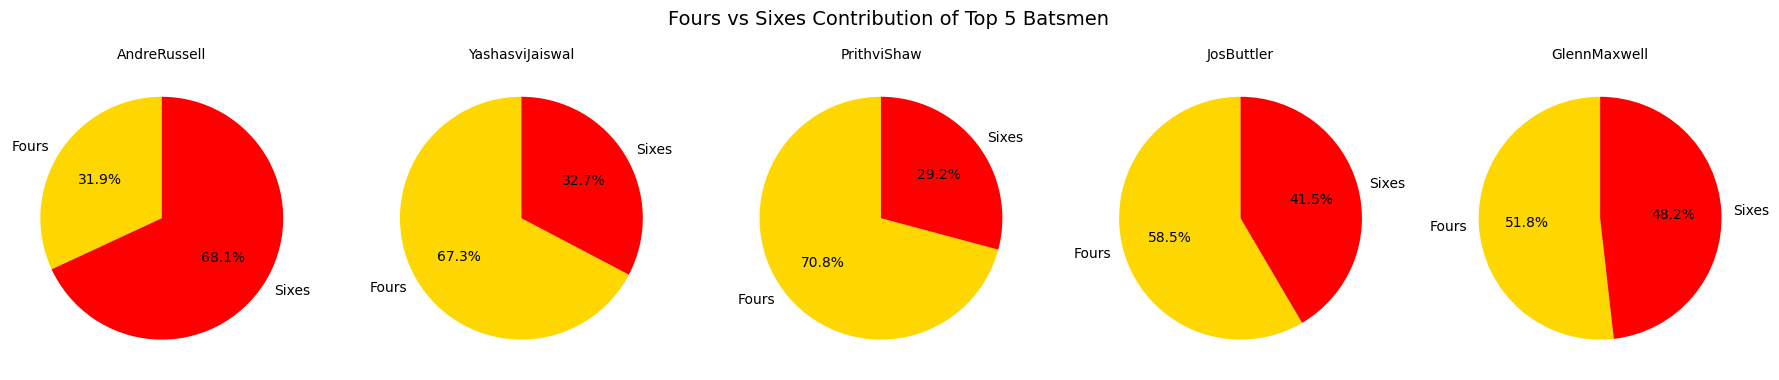

In [1095]:
fig, axes = plt.subplots(1, 5, figsize=(18,4))

for ax, (player, row) in zip(axes, BP_5.iterrows()):
    fours_runs = row['total_fours'] * 4
    sixes_runs = row['total_six'] * 6
    
    ax.pie([fours_runs, sixes_runs],
           labels=['Fours', 'Sixes'],
           autopct='%1.1f%%',
           startangle=90,
           colors=['gold', 'red'])
    
    ax.set_title(player, fontsize=10)

plt.suptitle("Fours vs Sixes Contribution of Top 5 Batsmen", fontsize=14)
plt.tight_layout()
plt.show()

In [1096]:
#8  Top 5 bowlers based on past 3 years dot ball %.

bowl_sum['year'] = pd.to_datetime(bowl_sum['matchDate'], errors='coerce').dt.year


stats = (bowl_sum.groupby(['year', 'bowlerName'])
                 .agg(
                     balls=('balls','sum'),
                     dots=('0s', 'sum')
                 ))

# Filter by minimum 10 overs per season
stats = stats[stats['balls'] >= 60]

# Compute bowler average per year
stats['dots%'] = (stats['dots'] / stats['balls'])*100

print(stats)


                         balls  dots      dots%
year   bowlerName                              
2021.0 AdamMilne            84    31  36.904762
       AmitMishra           60    17  28.333333
       AndreRussell        114    39  34.210526
       AnrichNortje        182    84  46.153846
       ArshdeepSingh       248    88  35.483871
...                        ...   ...        ...
2023.0 WashingtonSundar    106    35  33.018868
       WayneParnell        151    56  37.086093
       YashDayal            84    24  28.571429
       YashThakur          191    70  36.649215
       YuzvendraChahal     317    97  30.599369

[234 rows x 3 columns]


In [1097]:
#8

valid_bowler = stats.reset_index().groupby('bowlerName')['year'].nunique()
valid_bowler = valid_bowler[valid_bowler == 3].index

stats = stats.loc[stats.index.get_level_values('bowlerName').isin(valid_bowler)]

# Step: compute overall batting average = total runs / total outs across 3 years
overall = stats.groupby('bowlerName').agg(
    total_dots=('dots','sum'),
    total_balls=('balls','sum')
)

overall['dots%'] = (overall['total_dots'] / overall['total_balls'])*100

# Top 10 batsmen by overall batting average
dots_5 = overall.sort_values('dots%',ascending=False).head(5)

print(dots_5)

               total_dots  total_balls      dots%
bowlerName                                       
MohammedShami         505         1054  47.912713
MohammedSiraj         438          918  47.712418
TrentBoult            421          908  46.365639
UmranMalik            215          487  44.147844
KhaleelAhmed          249          571  43.607706


In [1098]:
#8

extra_stats = (bowl_sum.groupby('bowlerName')
               .agg(
                   total_balls=('balls','sum'),
                   total_dots=('0s','sum'),
                   total_fours=('4s','sum'),
                   total_sixes=('6s','sum')
               ))

# Get only the bowler names
top5_names = dots_5.index  

# Subset extra_stats using those names
merged = extra_stats.loc[top5_names]

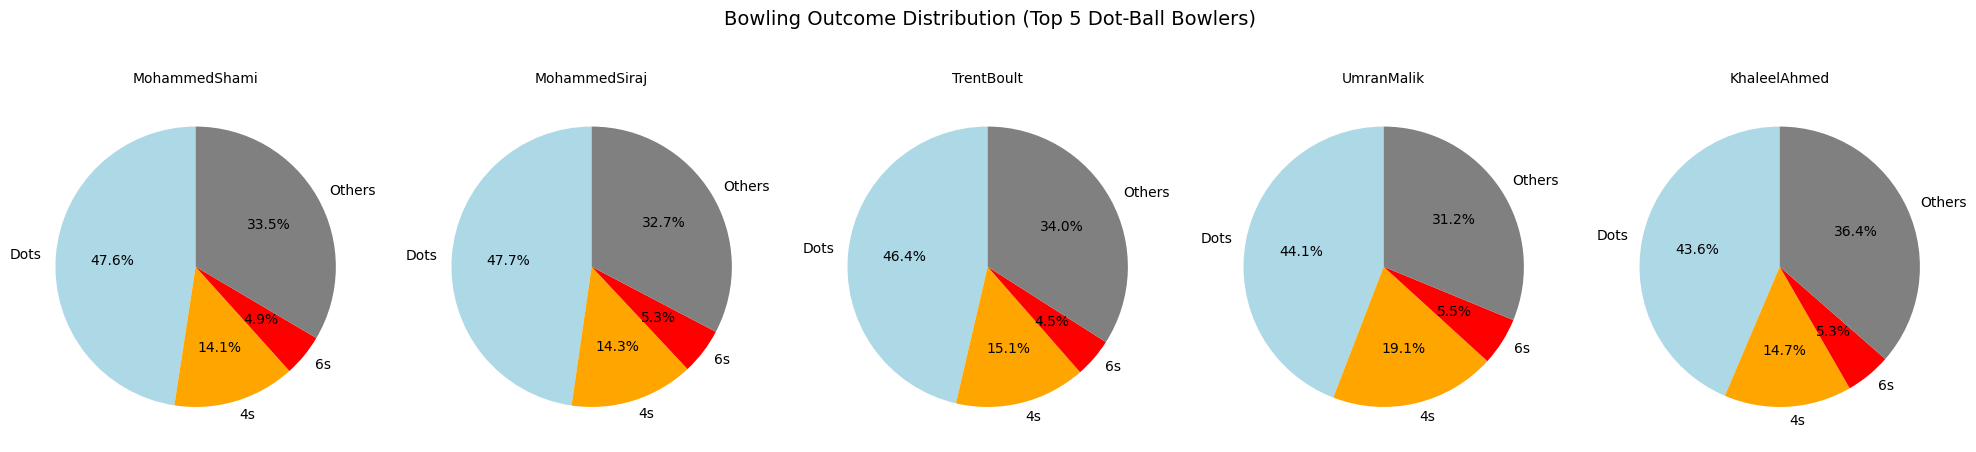

In [1099]:
#8

fig, axes = plt.subplots(1, 5, figsize=(20,5))

for ax, (player, row) in zip(axes, merged.iterrows()):
    dot = row['total_dots']
    fours = row['total_fours']
    sixes = row['total_sixes']
    others = row['total_balls'] - (dot + fours + sixes)
    
    ax.pie([dot, fours, sixes, others],
           labels=['Dots','4s','6s','Others'],
           autopct='%1.1f%%',
           startangle=90,
           colors=['lightblue','orange','red','grey'])
    
    ax.set_title(player, fontsize=10)

plt.suptitle("Bowling Outcome Distribution (Top 5 Dot-Ball Bowlers)", fontsize=14)
plt.tight_layout()
plt.show()

In [1100]:
#9  Top 4 teams based on past 3 years winning %.

played_t1=matches["team1"].value_counts().sort_index()
played_t2=matches["team2"].value_counts().sort_index()

tot_played=played_t1+played_t2

wins=matches["winner"].value_counts().sort_index()

top_teams=(wins/tot_played)*100
top_teams.head(4)

winner
Capitals        48.837209
KKR             46.666667
Mumbai          45.454545
Punjab Kings    45.238095
Name: count, dtype: float64

ValueError: 'facecolor' or 'color' argument must be a valid color or sequence of colors.

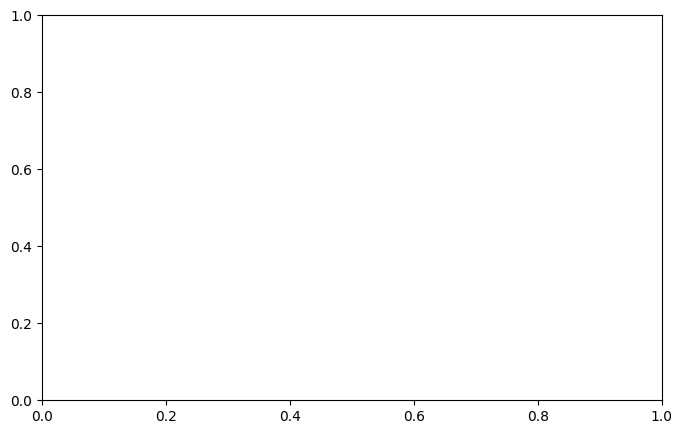

In [1101]:
bar_width = 0.35
x = range(len(top_teams.head(4)))

plt.figure(figsize=(8,5))

# Matches played
plt.bar(x, tot_played.loc[top_teams.head(4).index], bar_width, label='Matches Played', color='orange ')

# Matches won
plt.bar(x, wins.loc[top_teams.head(4).index], bar_width, label='Matches Won', color='green')

# Add winning % labels
for i, team in enumerate(top_teams.head(4).index):
    plt.text(i, wins[team] + 1, f"{top_teams[team]:.1f}%", ha='center', va='bottom', fontweight='bold')

plt.xticks(x, top_teams.head(4).index, rotation=45, ha='right')
plt.ylabel("Matches")
plt.title("Top 4 Teams by Winning % (Past 3 Years)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#10  Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.

# Add year column
matches['year'] = pd.to_datetime(matches['matchDate'], errors='coerce').dt.year

# Filter matches where win was by wickets (chasing wins)
chasing_wins = matches[matches['margin'].str.contains("wickets", case=False, na=False)]
non_chasing_wins = matches[~matches['margin'].str.contains("wickets", case=False, na=False)]

# Count wins per team
chasing_counts = chasing_wins['winner'].value_counts()
non_chasing_counts = non_chasing_wins['winner'].value_counts()
# Top 2 teams
top2_chasing = chasing_counts.head(2)
top2_non_chasing = non_chasing_counts.head(2)

print(top2_chasing)

print(top2_non_chasing)


winner
KKR         14
Capitals    14
Name: count, dtype: int64
winner
RCB            15
Super Kings    14
Name: count, dtype: int64


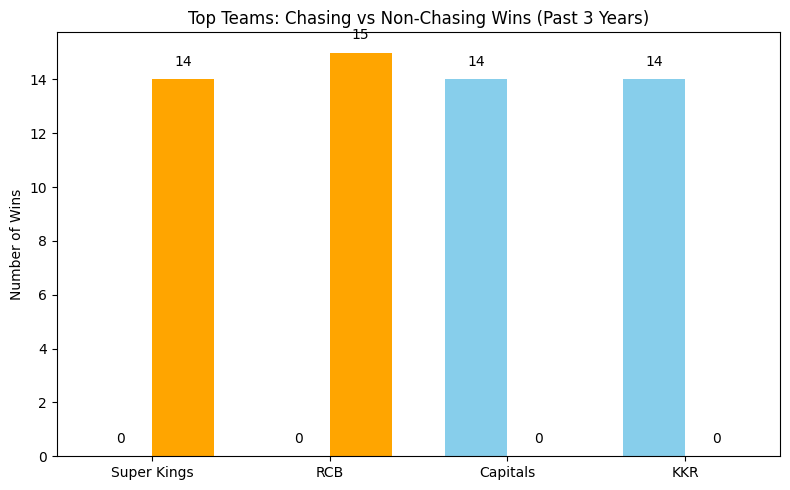

In [ ]:
teams = list(set(top2_chasing.index).union(set(top2_non_chasing.index)))
chasing_vals = [top2_chasing.get(team, 0) for team in teams]
non_chasing_vals = [top2_non_chasing.get(team, 0) for team in teams]

x = range(len(teams))
bar_width = 0.35

plt.figure(figsize=(8,5))
plt.bar([i - bar_width/2 for i in x], chasing_vals, bar_width, color='skyblue')
plt.bar([i + bar_width/2 for i in x], non_chasing_vals, bar_width, color='orange')

plt.xticks(x, teams)
plt.ylabel("Number of Wins")
plt.title("Top Teams: Chasing vs Non-Chasing Wins (Past 3 Years)")

for i in x:
    plt.text(i - bar_width/2, chasing_vals[i] + 0.5, str(chasing_vals[i]), ha='center')
    plt.text(i + bar_width/2, non_chasing_vals[i] + 0.5, str(non_chasing_vals[i]), ha='center')

plt.tight_layout()
plt.show()

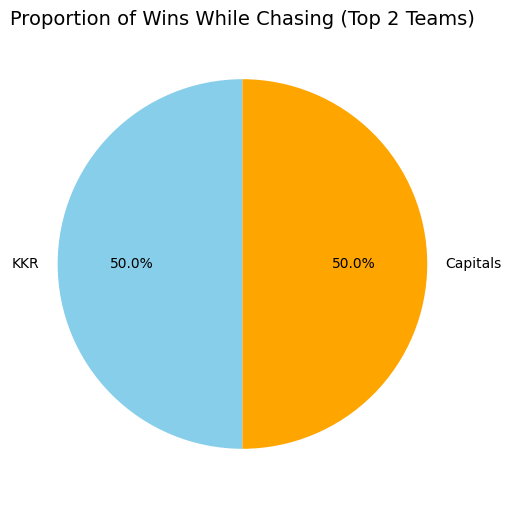

In [ ]:

plt.figure(figsize=(6,6))
plt.pie(top2_chasing, labels=top2_chasing.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','orange'])
plt.title("Proportion of Wins While Chasing (Top 2 Teams)", fontsize=14)
plt.show()


In [ ]:
#2.1.1  Predict Orange cap player for 2024

bat_runs = (bat_sum.groupby(['year', 'batsmanName'])
                   .agg(runs=('runs', 'sum'))
                   .reset_index())

# Store predictions
bat_predictions = []

# Predict runs for each batsman for 2024 using Linear Regression
for batsman in bat_runs['batsmanName'].unique():
    data = bat_runs[bat_runs['batsmanName'] == batsman]
    if len(data) >= 2:  # Need at least 2 points to fit a line
        X = data[['year']].values
        y = data['runs'].values
        
        model = LinearRegression()
        model.fit(X, y)
        pred_2024 = model.predict(np.array([[2024]]))[0]
        
        bat_predictions.append((batsman, pred_2024))


bat_predictions_df = pd.DataFrame(bat_predictions, columns=['Batsman', 'Predicted_Runs_2024'])
orange_cap_2024 = bat_predictions_df.sort_values(by='Predicted_Runs_2024', ascending=False)
print("top 5 predicted players :\n",orange_cap_2024.head(),"\n\n")
print("top predicted player :\n",orange_cap_2024.head(1))

top 5 predicted players :
           Batsman  Predicted_Runs_2024
129   DevonConway                998.0
103   ShubmanGill                977.0
79   RajatPatidar                857.0
102   ShreyasIyer                853.0
144    RinkuSingh                774.0 


top predicted player :
          Batsman  Predicted_Runs_2024
129  DevonConway                998.0


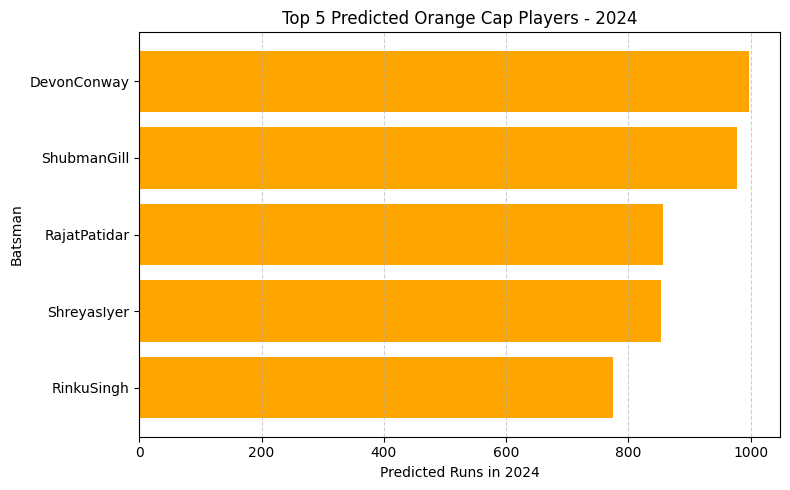

In [ ]:
#2.1.1 plot

import matplotlib.pyplot as plt

# Take Top 5 for graph
top5_batsmen = orange_cap_2024.head(5)

plt.figure(figsize=(8,5))
plt.barh(top5_batsmen['Batsman'], top5_batsmen['Predicted_Runs_2024'], color='orange')
plt.xlabel("Predicted Runs in 2024")
plt.ylabel("Batsman")
plt.title("Top 5 Predicted Orange Cap Players - 2024")
plt.gca().invert_yaxis()  # So the highest is at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#2.1.2  Predict purple cap player for 2024

# Aggregate wickets per bowler per year
bowl_wickets = (bowl_sum.groupby(['year', 'bowlerName'])
                        .agg(wickets=('wickets', 'sum'))
                        .reset_index())

# Store predictions
bowl_predictions = []

# Predict wickets for each bowler for 2024 using Linear Regression
for bowler in bowl_wickets['bowlerName'].unique():
    data = bowl_wickets[bowl_wickets['bowlerName'] == bowler]
    
    if len(data) >= 2:
        X = data[['year']].values
        y = data['wickets'].values
        
        model = LinearRegression()
        model.fit(X, y)
        pred_2024 = model.predict(np.array([[2024]]))[0]
        
        bowl_predictions.append((bowler, pred_2024))

# Convert to DataFrame and get top bowler
bowl_predictions_df = pd.DataFrame(bowl_predictions, columns=['Bowler', 'Predicted_Wickets_2024'])
purple_cap_2024 = bowl_predictions_df.sort_values(by='Predicted_Wickets_2024', ascending=False)

print("top 5 predicted players :\n",purple_cap_2024.head(),"\n\n")
print("top predicted player :\n",purple_cap_2024.head(1))

top 5 predicted players :
               Bowler  Predicted_Wickets_2024
111  TusharDeshpande               41.000000
16        DanielSams               37.000000
58    PrasidhKrishna               33.000000
57      PiyushChawla               32.500000
48     MohammedShami               31.333333 


top predicted player :
               Bowler  Predicted_Wickets_2024
111  TusharDeshpande                    41.0


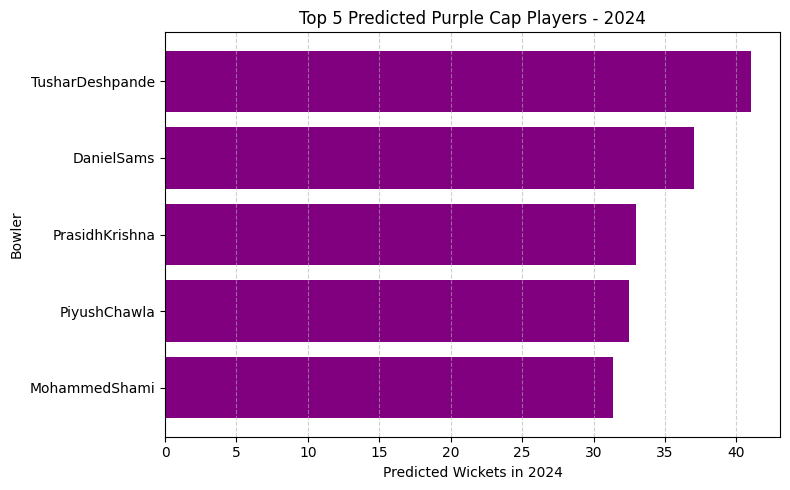

In [ ]:
#2.1.2 plot

import matplotlib.pyplot as plt

# Take Top 5 for graph
top5 = purple_cap_2024.head(5)

plt.figure(figsize=(8,5))
plt.barh(top5['Bowler'], top5['Predicted_Wickets_2024'], color='purple')
plt.xlabel("Predicted Wickets in 2024")
plt.ylabel("Bowler")
plt.title("Top 5 Predicted Purple Cap Players - 2024")
plt.gca().invert_yaxis()  # So highest is at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#2.2  top 4 qualifying teams 

# Step 2: Count wins per team per year
team_wins = matches.groupby(['year', 'winner']).size().reset_index(name='wins')
team_wins.rename(columns={'winner': 'team'}, inplace=True)

# Step 3: Predict wins for 2024 using Linear Regression
predictions = []

for team in team_wins['team'].unique():
    data = team_wins[team_wins['team'] == team]
    if len(data) >= 2:  # Need at least 2 points to fit a line
        X = data[['year']].values
        y = data['wins'].values
        
        model = LinearRegression()
        model.fit(X, y)
        pred_2024 = model.predict(np.array([[2024]]))[0]
        
        predictions.append((team, pred_2024))

# Step 4: Create DataFrame with predictions
pred_df = pd.DataFrame(predictions, columns=['Team', 'Predicted_Wins_2024'])

# Step 5: Get Top 4 teams
top_teams = pred_df.sort_values(by='Predicted_Wins_2024', ascending=False)

# Results
print("Predicted Top 4 Teams for 2024 Playoffs:")
print(top_teams.head(4))


Predicted Top 4 Teams for 2024 Playoffs:
           Team  Predicted_Wins_2024
9        Titans            10.000000
5        Royals             9.333333
2        Mumbai             8.666667
8  Super Giants             7.000000


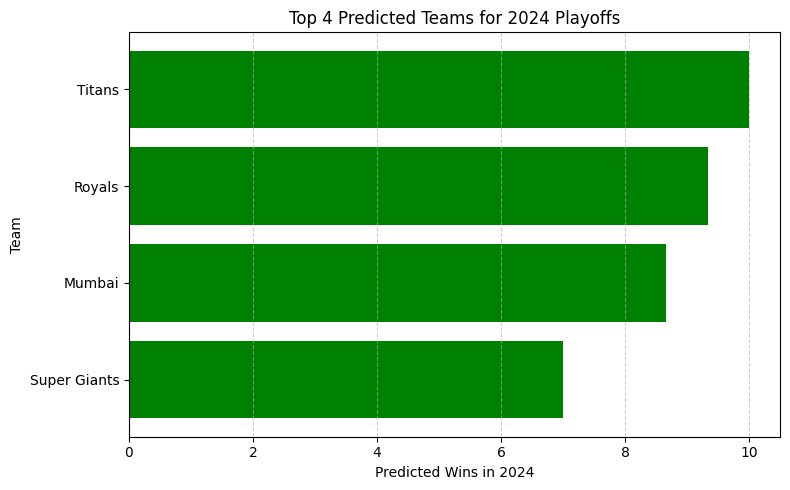

In [ ]:


# Take Top 4 teams for graph
top4_teams = top_teams.head(4)

plt.figure(figsize=(8,5))
plt.barh(top4_teams['Team'], top4_teams['Predicted_Wins_2024'], color='green')
plt.xlabel("Predicted Wins in 2024")
plt.ylabel("Team")
plt.title("Top 4 Predicted Teams for 2024 Playoffs")
plt.gca().invert_yaxis()  # So highest is at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#2.3  Winner and runner-up Your Picks

top_2_teams=top_teams.head(2)
print("Winner aand Runnner Prediction is : \n\n",top_2_teams)

Winner aand Runnner Prediction is : 

      Team  Predicted_Wins_2024
9  Titans            10.000000
5  Royals             9.333333


In [ ]:
#2.4  Pick your team selecting the Best 11 players based on their positions, 3 years performance data and additional research


# Step 1: Prepare batting data
bat_sum['year'] = pd.to_datetime(bat_sum['matchDate'], errors='coerce').dt.year
bat_runs = (bat_sum.groupby(['year', 'batsmanName'])
                   .agg(runs=('runs', 'sum'))
                   .reset_index())
bat_runs = bat_runs[bat_runs['year'].isin([2021, 2022, 2023])]
bat_runs.rename(columns={'batsmanName': 'player'}, inplace=True)

# Step 2: Prepare bowling data
bowl_sum['year'] = pd.to_datetime(bowl_sum['matchDate'], errors='coerce').dt.year
bowl_wickets = (bowl_sum.groupby(['year', 'bowlerName'])
                        .agg(wickets=('wickets', 'sum'))
                        .reset_index())
bowl_wickets = bowl_wickets[bowl_wickets['year'].isin([2021, 2022, 2023])]
bowl_wickets.rename(columns={'bowlerName': 'player'}, inplace=True)

# Step 3: Get all players with both batting & bowling stats
all_rounders = pd.merge(bat_runs, bowl_wickets, on=['year','player'], how='inner')



In [ ]:
# Step 4: Predict 2024 Runs & Wickets for each player
predictions = []

for player in all_rounders['player'].unique():
    bat_data = bat_runs[bat_runs['player'] == player]
    bowl_data = bowl_wickets[bowl_wickets['player'] == player]
    
    if len(bat_data) >= 2 and len(bowl_data) >= 2:
        # Batting prediction
        X_bat = bat_data[['year']].values
        y_bat = bat_data['runs'].values
        model_bat = LinearRegression().fit(X_bat, y_bat)
        pred_runs_2024 = model_bat.predict(np.array([[2024]]))[0]
        
        # Bowling prediction
        X_bowl = bowl_data[['year']].values
        y_bowl = bowl_data['wickets'].values
        model_bowl = LinearRegression().fit(X_bowl, y_bowl)
        pred_wickets_2024 = model_bowl.predict(np.array([[2024]]))[0]
        
        predictions.append((player, pred_runs_2024, pred_wickets_2024))



In [ ]:
# Step 5: Convert to DataFrame
pred_df = pd.DataFrame(predictions, columns=['Player','Predicted_Runs_2024','Predicted_Wickets_2024'])

# Step 6: Scale both metrics for fair comparison
scaler = MinMaxScaler()
pred_df[['Scaled_Runs','Scaled_Wickets']] = scaler.fit_transform(
    pred_df[['Predicted_Runs_2024','Predicted_Wickets_2024']]
)

# Step 7: All-Rounder Score = Scaled Runs + Scaled Wickets
pred_df['All_Rounder_Score'] = pred_df['Scaled_Runs'] + pred_df['Scaled_Wickets']

# Step 8: Sort all players by score (highest first)
all_players_scores = pred_df.sort_values(by='All_Rounder_Score', ascending=False)

# ---------------- Results ---------------- #
print("All Players All-Rounder Scores for 2024 (Predicted):")
print(all_players_scores.head(11)[['Player','Predicted_Runs_2024','Predicted_Wickets_2024','All_Rounder_Score']])


All Players All-Rounder Scores for 2024 (Predicted):
             Player  Predicted_Runs_2024  Predicted_Wickets_2024  \
11       DanielSams           102.000000               37.000000   
33    MarcusStoinis           530.000000                6.666667   
48       RashidKhan           148.333333               31.000000   
54        SamCurran           386.000000               10.500000   
6         AxarPatel           411.333333                8.000000   
44     PiyushChawla            37.500000               32.500000   
45   PrasidhKrishna            18.000000               33.000000   
77     HardikPandya           511.000000               -2.000000   
42       NitishRana           415.666667                4.000000   
35    MohammedShami             1.000000               31.333333   
84  LiamLivingstone           489.666667               -2.000000   

    All_Rounder_Score  
11           1.441253  
33           1.405229  
48           1.384094  
54           1.292403  
6         

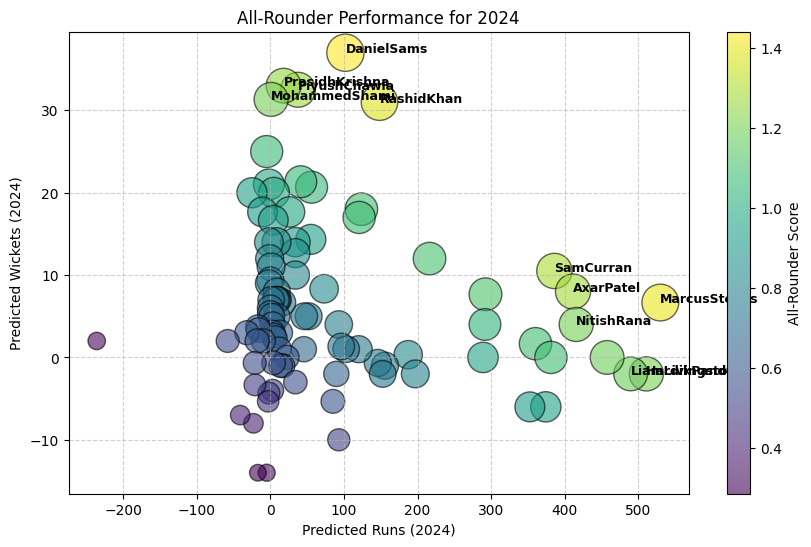

In [ ]:
#2.4 plot

import matplotlib.pyplot as plt

# Sort to get top 5 players
top5 = all_players_scores.sort_values(by='All_Rounder_Score', ascending=False).head(11)

plt.figure(figsize=(10,6))
plt.scatter(all_players_scores['Predicted_Runs_2024'], 
            all_players_scores['Predicted_Wickets_2024'],
            s=all_players_scores['All_Rounder_Score']*500,
            c=all_players_scores['All_Rounder_Score'],
            cmap='viridis',
            alpha=0.6,
            edgecolors='k')

# Add labels only for top 5
for i in top5.index:
    plt.text(all_players_scores.loc[i, 'Predicted_Runs_2024'],
             all_players_scores.loc[i, 'Predicted_Wickets_2024'],
             all_players_scores.loc[i, 'Player'],
             fontsize=9, fontweight='bold')

plt.xlabel("Predicted Runs (2024)")
plt.ylabel("Predicted Wickets (2024)")
plt.title("All-Rounder Performance for 2024")
plt.colorbar(label="All-Rounder Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



In [ ]:
#2.5  Pick your top 3 all-rounders
from sklearn.preprocessing import MinMaxScaler

# Step 1: Prepare batting data
bat_sum['year'] = pd.to_datetime(bat_sum['matchDate'], errors='coerce').dt.year
bat_runs = (bat_sum.groupby(['year', 'batsmanName'])
                   .agg(runs=('runs', 'sum'))
                   .reset_index())
bat_runs = bat_runs[bat_runs['year'].isin([2021, 2022, 2023])]

# Step 2: Prepare bowling data
bowl_sum['year'] = pd.to_datetime(bowl_sum['matchDate'], errors='coerce').dt.year
bowl_wickets = (bowl_sum.groupby(['year', 'bowlerName'])
                        .agg(wickets=('wickets', 'sum'))
                        .reset_index())
bowl_wickets = bowl_wickets[bowl_wickets['year'].isin([2021, 2022, 2023])]

# Step 3: Rename for merging
bat_runs.rename(columns={'batsmanName': 'player'}, inplace=True)
bowl_wickets.rename(columns={'bowlerName': 'player'}, inplace=True)

# Step 4: Get all-rounders → players with both batting & bowling data
all_rounders = pd.merge(bat_runs, bowl_wickets, on=['year','player'], how='inner')



In [ ]:
# Step 5: Predict runs & wickets for 2024 using Linear Regression
predictions = []

for player in all_rounders['player'].unique():
    # Batting prediction
    bat_data = bat_runs[bat_runs['player'] == player]
    bowl_data = bowl_wickets[bowl_wickets['player'] == player]
    
    if len(bat_data) >= 2 and len(bowl_data) >= 2:
        # Runs prediction
        X_bat = bat_data[['year']].values
        y_bat = bat_data['runs'].values
        model_bat = LinearRegression().fit(X_bat, y_bat)
        pred_runs_2024 = model_bat.predict(np.array([[2024]]))[0]
        
        # Wickets prediction
        X_bowl = bowl_data[['year']].values
        y_bowl = bowl_data['wickets'].values
        model_bowl = LinearRegression().fit(X_bowl, y_bowl)
        pred_wickets_2024 = model_bowl.predict(np.array([[2024]]))[0]
        
        predictions.append((player, pred_runs_2024, pred_wickets_2024))

pred_df = pd.DataFrame(predictions, columns=['Player','Predicted_Runs_2024','Predicted_Wickets_2024'])



In [ ]:
# Step 6: Scale runs and wickets for fair comparison
scaler = MinMaxScaler()
pred_df[['Scaled_Runs', 'Scaled_Wickets']] = scaler.fit_transform(
    pred_df[['Predicted_Runs_2024', 'Predicted_Wickets_2024']]
)

# Step 7: All-Rounder Score = sum of both scaled metrics
pred_df['All_Rounder_Score'] = pred_df['Scaled_Runs'] + pred_df['Scaled_Wickets']

# Step 8: Pick Top 3 all-rounders
top_3_all_rounders = pred_df.sort_values(by='All_Rounder_Score', ascending=False).head(3)

# ---------------- Results ---------------- #
print("Top 3 All-Rounders for 2024 (Predicted):")
print(top_3_all_rounders[['Player','Predicted_Runs_2024','Predicted_Wickets_2024','All_Rounder_Score']])


Top 3 All-Rounders for 2024 (Predicted):
           Player  Predicted_Runs_2024  Predicted_Wickets_2024  \
11     DanielSams           102.000000               37.000000   
33  MarcusStoinis           530.000000                6.666667   
48     RashidKhan           148.333333               31.000000   

    All_Rounder_Score  
11           1.441253  
33           1.405229  
48           1.384094  


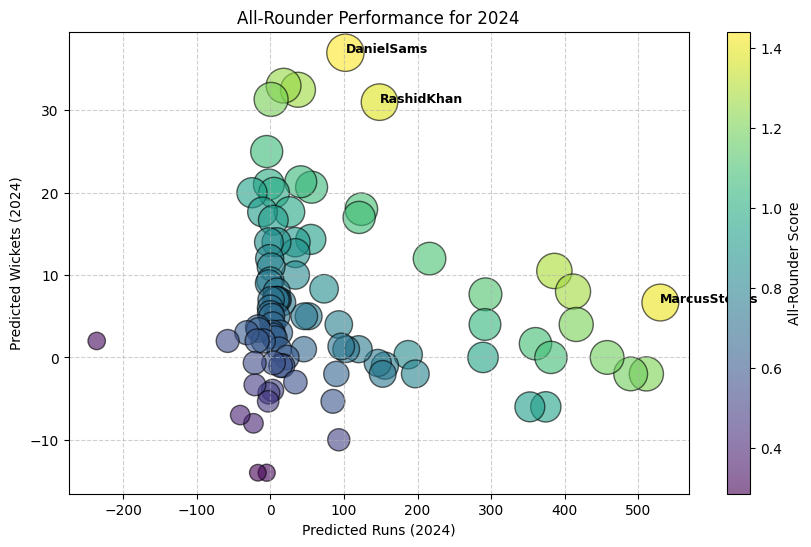

In [ ]:
#2.5 plot

import matplotlib.pyplot as plt

# Sort to get top 5 players
top5 = all_players_scores.sort_values(by='All_Rounder_Score', ascending=False).head(3)

plt.figure(figsize=(10,6))
plt.scatter(all_players_scores['Predicted_Runs_2024'], 
            all_players_scores['Predicted_Wickets_2024'],
            s=all_players_scores['All_Rounder_Score']*500,
            c=all_players_scores['All_Rounder_Score'],
            cmap='viridis',
            alpha=0.6,
            edgecolors='k')

# Add labels only for top 5
for i in top5.index:
    plt.text(all_players_scores.loc[i, 'Predicted_Runs_2024'],
             all_players_scores.loc[i, 'Predicted_Wickets_2024'],
             all_players_scores.loc[i, 'Player'],
             fontsize=9, fontweight='bold')

plt.xlabel("Predicted Runs (2024)")
plt.ylabel("Predicted Wickets (2024)")
plt.title("All-Rounder Performance for 2024")
plt.colorbar(label="All-Rounder Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

